In [168]:
import pandas as pd
data = pd.read_csv("C:\\LIngga\\KECERDASAN BUATAN\\winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


disini saya mencoba untuk melihat bagian atas dari data saya untuk mengecek keseragaman dari nilai tiap kolom.

In [169]:
data.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

disini saya mencoba untuk melihat nilai yang unik dari kolom quality

In [170]:
data = data.replace({'quality' :  {
                            8 : 'Good',
                            7 : 'Good',
                            6 : 'Middle',
                            5 : 'Middle',
                            4 : 'Bad',
                            3 : 'Bad',
}}
)

nilai unik dari kolom quality tadi saya ubah menjadi beberapa kategori.

In [171]:
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Middle
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Middle
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Middle
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Middle
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Middle


saya mengecek kembali lagi apakah sudah berubah atau belum dengan menampilkan bebrapa data.

In [172]:
x_temp = data.drop(columns='quality')
y = data.quality

disini saya separate/ memisahkan antara label dan atritbut dari dataset yang telah saya modifikasi  sebelumnya, dimana kolom quality adalah label yang menjadi target.

In [184]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler(feature_range=(0, 1)).fit_transform(x_temp)
x = pd.DataFrame(scaler, columns=x_temp.columns)

print(data_normalized)


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.247788          0.397260         0.00        0.068493   0.106845   
1          0.283186          0.520548         0.00        0.116438   0.143573   
2          0.283186          0.438356         0.04        0.095890   0.133556   
3          0.584071          0.109589         0.56        0.068493   0.105175   
4          0.247788          0.397260         0.00        0.068493   0.106845   
...             ...               ...          ...             ...        ...   
1594       0.141593          0.328767         0.08        0.075342   0.130217   
1595       0.115044          0.294521         0.10        0.089041   0.083472   
1596       0.150442          0.267123         0.13        0.095890   0.106845   
1597       0.115044          0.359589         0.12        0.075342   0.105175   
1598       0.123894          0.130137         0.47        0.184932   0.091820   

      free sulfur dioxide  

karena skala pada  atribut dataset yang saya gunakan belum sama, jadi saya samakan terlebih dahulu.

In [174]:
print(data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


disini saya ingin melihat apakah ada data yang null atau kosong.

In [175]:
data.dropna(inplace=True)

 untuk memastikan kembali, saya menghapus data jika ada data  yang kosong.

In [176]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


disini saya separate/ memisahkan lagi data yang saya gunakan untuk di train dan untuk testing. perbandingan data train dan data testing yang saya gunakan yaitu 20:80, dimana 20% untuk data testing sedangkan 80% untuk data training.

In [177]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier(random_state = 42)
param_grid = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : list(np.arange(4, 30, 1))
}

grid_search = GridSearchCV(model, param_grid, cv=9, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=9, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                       16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
                                       26, 27, 28, 29],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

disini saya melakukan tuning hyperparameter pada model decision tree mengguankan grid search cross validation untuk menemukan kombinasi yang optimal dari machine learning model dengan parameter kriteria,splitter, dan kedalaman pohon.

In [178]:
best_model = grid_search.best_estimator_

disini saya menyimpan informasi mengenai model paling optimal/terbaik ke dalam variabel best_model

In [179]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy}')



Akurasi: 0.83125


disini saya menggunakan model terbaik yang telah saya temukan tadi menggunakan tuning hyperparameter untuk melakukan prediksi pada data testing (x_test). akurasinya sebesar 83%

In [180]:
cv_scores = cross_val_score(best_model, x, y, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')

Cross-validation scores: [0.83125    0.7625     0.83125    0.796875   0.81191223]
Mean cross-validation score: 0.8067574451410658


kemudian saya melakukan cross validation sebanyak 5 kali lalu merata - ratakan hasil dari cross validation tadi.

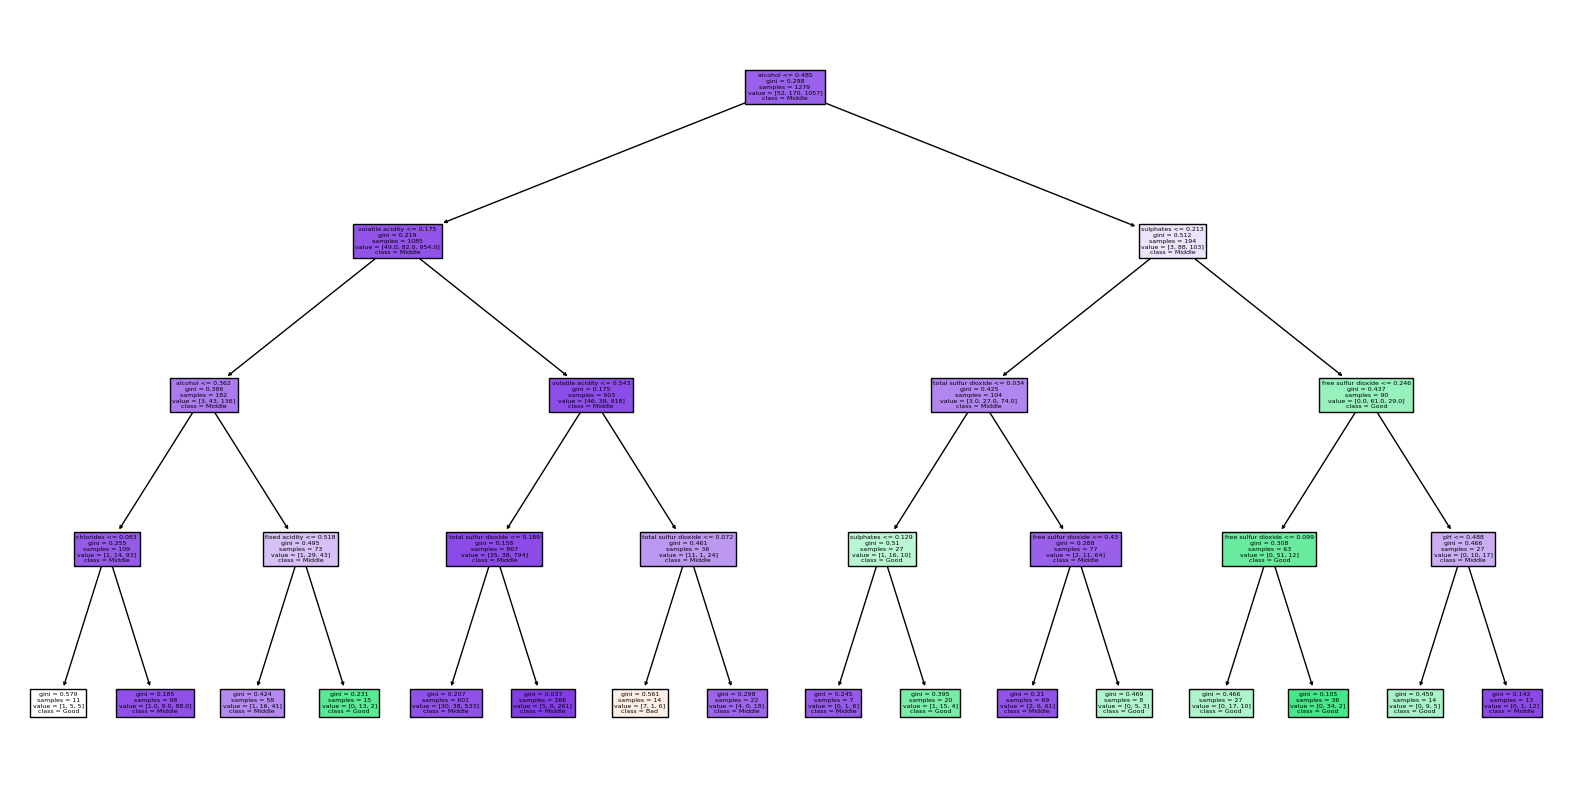

In [181]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20, 10))
tree.plot_tree(best_model, feature_names=x.columns, class_names=[str(i) for i in sorted(y.unique())], filled=True)
plt.show()



terakhir, saya memvisualisasikan dari model tree decision terbaik yang telah saya temukan sebelumnya menggunakan plot.